## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. Carga datos y representa la serie

In [2]:
df = pd.read_csv('data/AirPassengers.csv')

df['date'] = pd.to_datetime(df['date'],
                            infer_datetime_format=True)

df.set_index('date', inplace=True)

print(len(df))
df.head()

144


,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


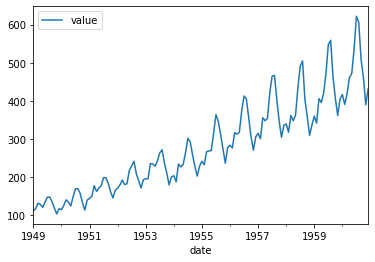

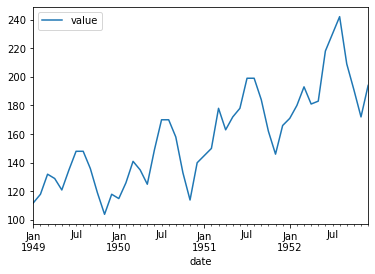

In [3]:
df.plot();
df[0:24*2].plot();

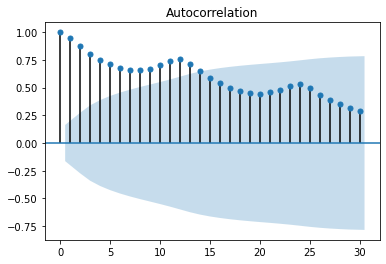

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
'''
Seasonality vista en grafica -> cada 12 intervalos de tiempo (meses)
'''

plot_acf(df['value'], lags=30);

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior

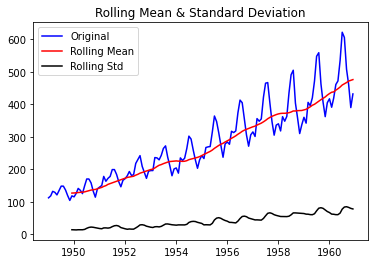

In [5]:
#Determine rolling statistics
rolmean = df.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df.rolling(window=12).std()

#Plot rolling statistics
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## 3. Comprueba de manera estadística si la serie es o no stationary.

In [6]:
'''
No es statationary por el test de DF, aunque se aprecia claramente en la gráfica.
'''
from statsmodels.tsa.stattools import adfuller

ad_fuller_result = adfuller(df['value'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060543
p-value: 0.9918802434376411


## 4. Aplica una transformación logarítmica

In [7]:
df['value'] = np.log(df['value'])

## 5. Divide en train y test. Guarda 20 muestras para test.

In [8]:
train = df['value'][0:125]
test = df['value'][125:]

## 6. Crea tu primer modelo ARIMA

In [9]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

'''
Primero probamos sin stationary
'''

model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    stationary=False,
                    warnings=False,
                    error_action = 'ignore',
                    trace=True,
                    stepwise=True)
print(model.aic())

predictions = model.predict(19)

print("MSE:", mean_squared_error(test.values, predictions))
print("RMSE:", np.sqrt(mean_squared_error(test.values, predictions)))
print("MAE:", mean_absolute_error(test.values, predictions))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-211.160, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-203.811, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-205.275, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-206.552, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-204.531, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-206.463, Time=0.07 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-228.724, Time=0.32 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-232.458, Time=0.36 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-231.946, Time=0.30 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-236.627, Time=0.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-216.484, Time=0.26 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-235.756, Time=0.43 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-249.055, Time=0.42 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-234.857, Time=0.45 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-231.546, Time=0.47 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-240.075, Time=0.46 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=-245.059, Time=0.54 sec

Best model:  ARIMA(4,1,3)(0,0,0)[0] intercept
Total fit time: 6.923 seconds
-249.05488903941819
MSE: 0.02604576429531769
RMSE: 0.16138700163060743
MAE: 0.14198741546820293


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [11]:
'''
Ahora probamos con stationary de m=12
'''

model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m=12,
                    stationary=False,
                    warnings=False,
                    error_action = 'ignore',
                    trace=True,
                   stepwise=True)
print(model.aic())

predictions = model.predict(19)

print("MSE:", mean_squared_error(test.values, predictions))
print("RMSE:", np.sqrt(mean_squared_error(test.values, predictions)))
print("MAE:", mean_absolute_error(test.values, predictions))

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-413.945, Time=1.21 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-294.133, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-403.899, Time=0.62 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-357.432, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-126.477, Time=0.01 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-415.947, Time=1.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-388.347, Time=0.22 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-414.040, Time=3.64 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-409.560, Time=0.89 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-411.480, Time=2.63 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-412.579, Time=0.77 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=-415.222, Time=1.02 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-414.397, Time=1.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-304.397, Time=0.19 sec
 ARIMA(0,0,2)(0,1,1

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  125
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -421.751
Date:                            Wed, 25 Nov 2020   AIC                            849.501
Time:                                    17:30:10   BIC                            857.684
Sample:                                         0   HQIC                           852.822
                                            - 125                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.9385      2.002      2.967      0.003       2.016       9.861
ar.L1          0.7937      0.065     12.255      0.000       0.667       0.921
sigma2       101.2674     12.111      8.362      0.000      77.531     125.004
===================================================================================
Ljung-Box (Q):                       43.01   Jarque-Bera (JB):                 1.76
Prob(Q):                              0.34   Prob(JB):                         0.41
Heteroskedasticity (H):               1.45   Skew:                            -0.10
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 7. Representa en una gráfica los datos de test y tus predicciones.

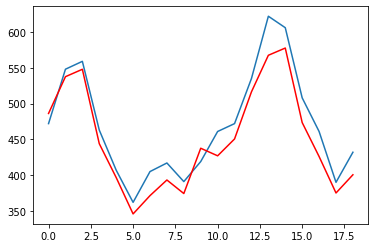

In [53]:
plt.plot(test.values)
plt.plot(predictions,color='red');

## 8. Prueba otros modelos, a ver qué performance presentan.

In [54]:
for i in range(12,0,-1):
    df['t-'+str(i)] = df['value'].shift(i)
df.dropna(inplace=True)

In [56]:
df.head()

,value,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1950-01-01,4.744932,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950-02-01,4.836282,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932
1950-03-01,4.948760,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282
1950-04-01,4.905275,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760
1950-05-01,4.828314,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760,4.905275


In [57]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 1].values

X_train = X[:125-12]
X_test = X[125-12:]
y_train = Y[:125-12]
y_test = Y[125-12:]

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (113, 12)
Shape X_test: (19, 12)
Shape y_train: (113,)
Shape y_test: (19,)


In [61]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
tree = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features and targets
tree.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

print("MSE:", mean_squared_error(tree.predict(X_test), y_test))
print("RMSE:", np.sqrt(mean_squared_error(tree.predict(X_test), y_test)))
print("MAE:", mean_absolute_error(tree.predict(X_test), y_test))

MSE: 0.009945615659415782
RMSE: 0.09972770758127243
MAE: 0.07968477155017788


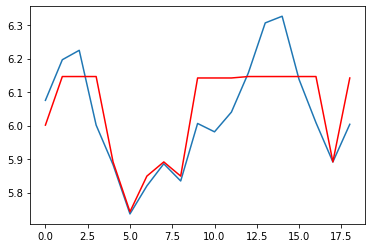

In [59]:
plt.plot(y_test);
plt.plot(tree.predict(X_test), color='red');